## В рамках работы "Исследование особенностей позиционирования посредством технологии Wi-Fi" было проведено исследование алгоритмов машинного обучения, подходящих для пассивного позиционирования в помещениях. Предложенные модели протестированы на реальных данных, полученных в одной из хоровых студий города Санкт-Петербурга.Результатом работы являются методика, позволяющая использовать алгоритмы машинного обучения  для позиционирования в помещениях, на основе данных об уровне принимаемого сигнала.

In [287]:
#библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as plн

## План студии, здание разбито как на квадраты, так и на x, y и z координаты

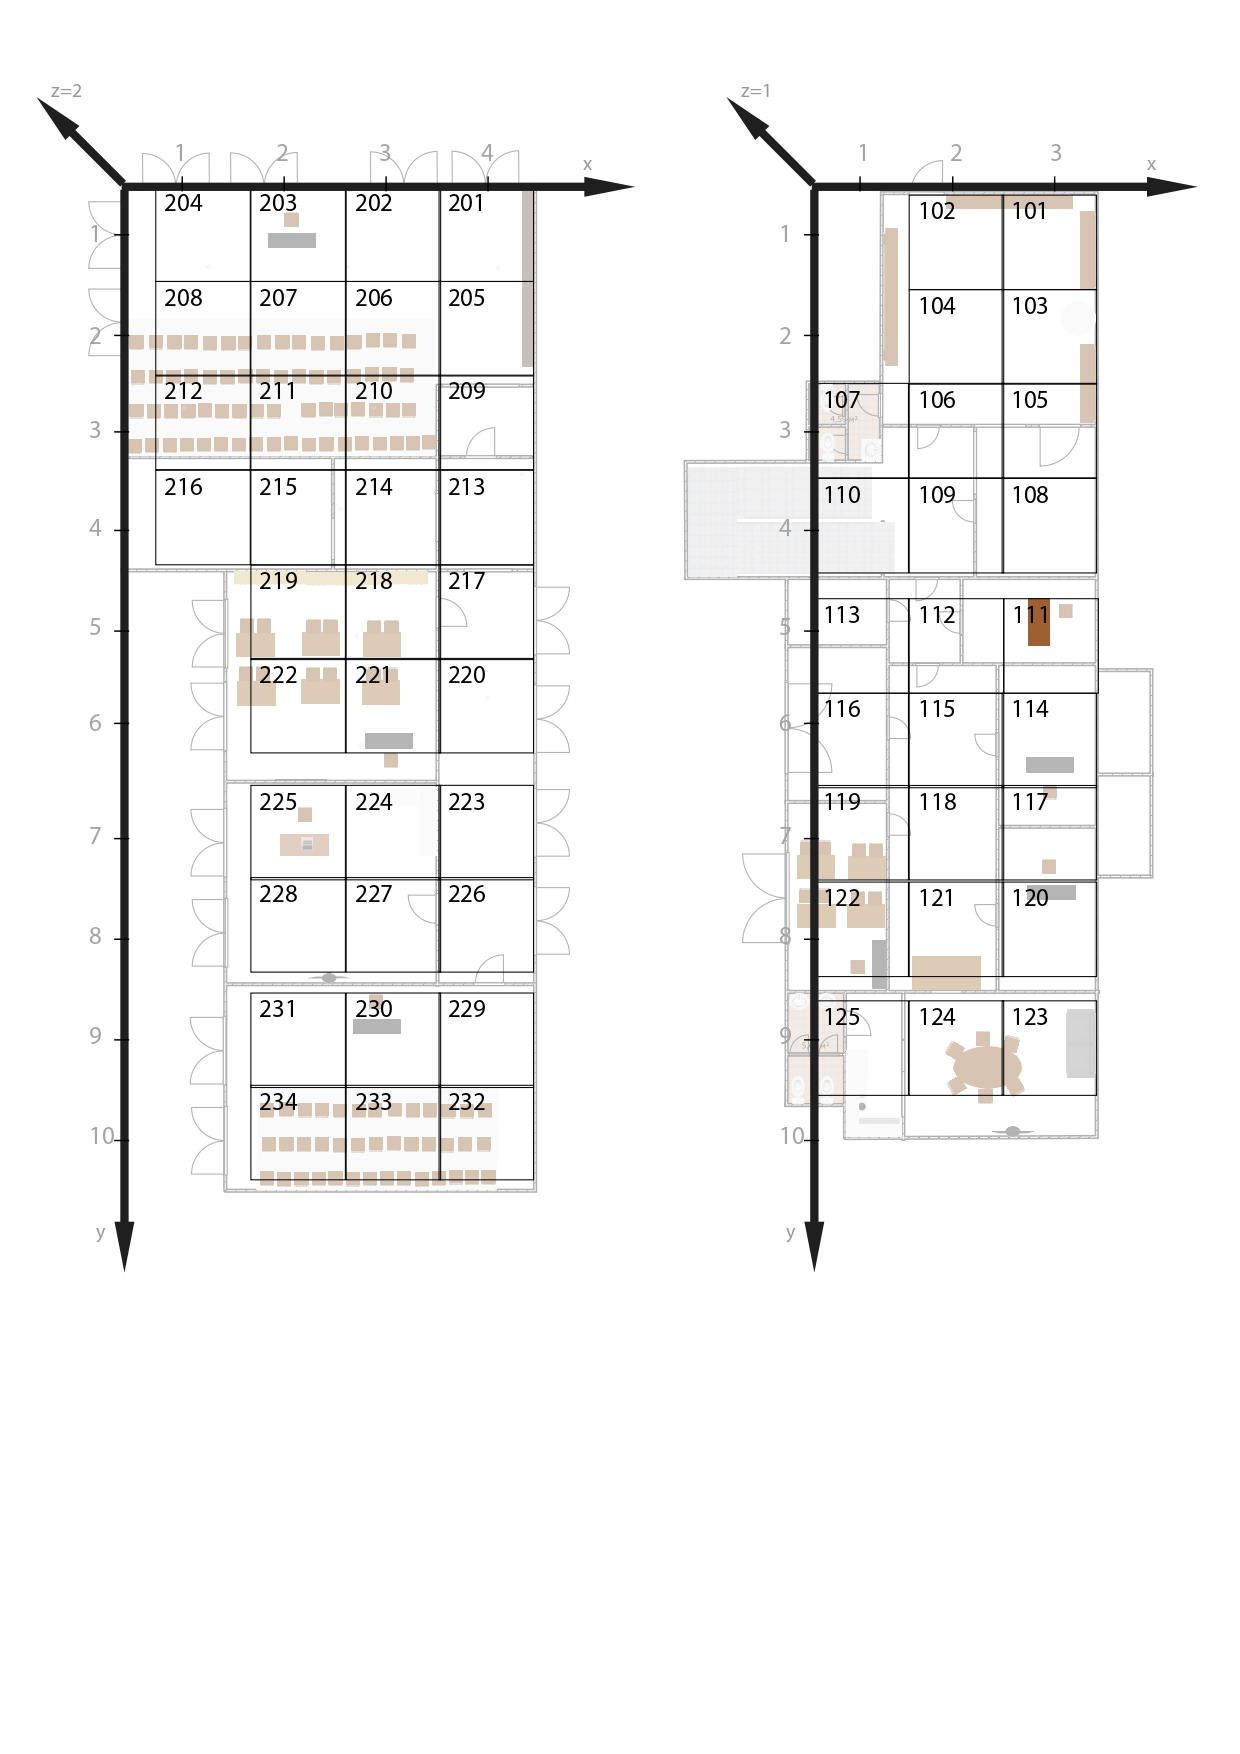

In [288]:
from IPython.display import Image
Image(r"C:\work\dipa\choir_plan.jpg")

# Предобработка данных

In [289]:
indoor = pd.read_excel(r'C:\work\dipa/Data_indoor.xlsx')
route = pd.read_excel(r'C:\work\dipa/Data_route.xlsx')

## В файле Data_indoor хранится информация об уровне сигнала 8 AP, а также соответствие x,y и z координатам и квадратам.В файле Data_route хранится 2 маршрута, в которых записаны соответствующие уровни сигналов и основной задачей стоит предсказать какие это могут быть координаты¶

In [290]:
indoor.head()

,ID,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56,square,x,y,z
0,1,-61,-74,-100,-78,-80,-98,-100,-100,201,4,1,2
1,2,-61,-74,-100,-74,-72,-100,-100,-100,201,4,1,2
2,3,-63,-74,-100,-76,-79,-100,-100,-100,201,4,1,2
3,4,-65,-73,-100,-77,-78,-100,-100,-100,201,4,1,2
4,5,-62,-75,-100,-75,-77,-99,-100,-100,201,4,1,2


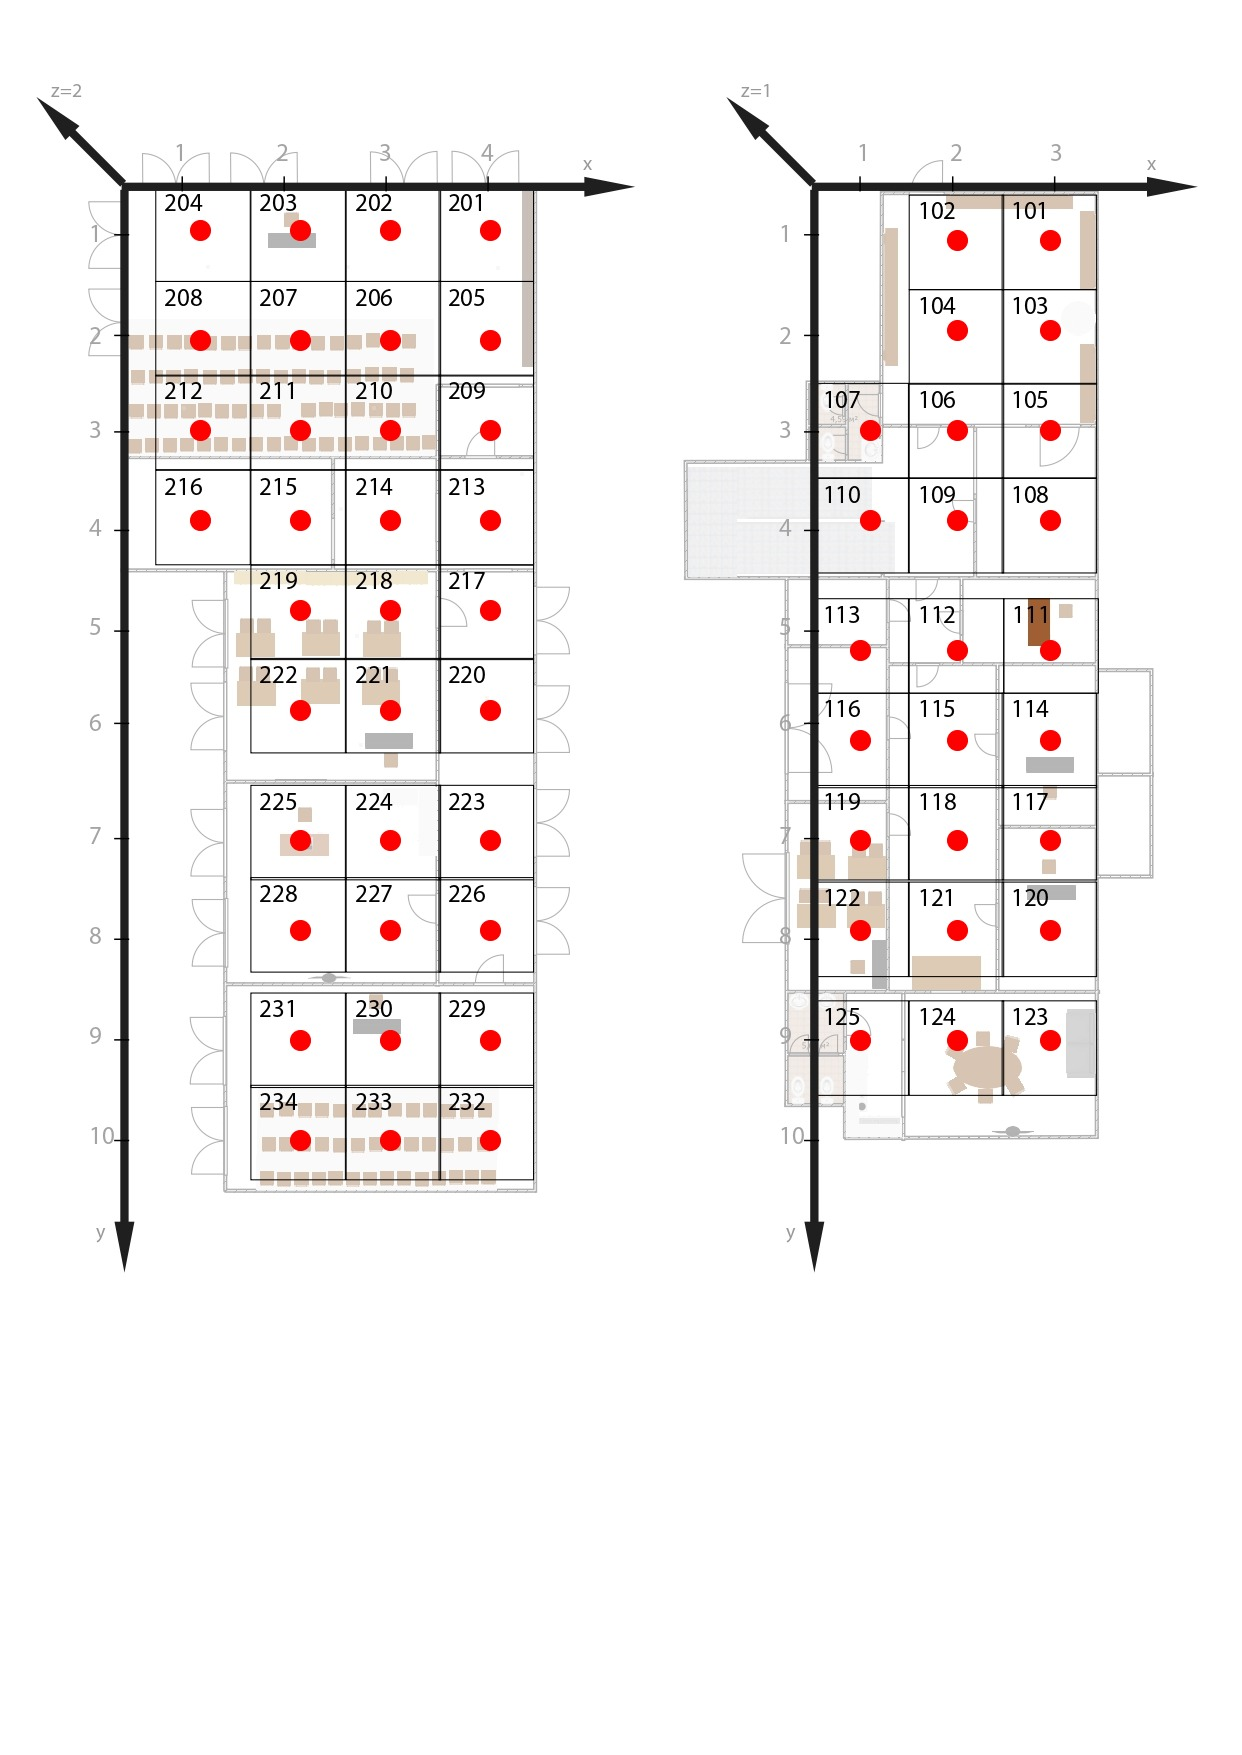

In [291]:
from IPython.display import Image
Image(r"C:\work\dipa\fingerprint.jpg")

In [292]:
indoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 13 columns):
ID               296 non-null object
Chorschule80     297 non-null object
ChorschuleE4     297 non-null object
ChorschuleEA     297 non-null object
Chorschule36     297 non-null object
Nauki106B        297 non-null object
Vysota67         297 non-null object
ChioChioNauki    298 non-null object
CHICAGA_NEW56    297 non-null object
square           296 non-null object
x                296 non-null object
y                296 non-null object
z                296 non-null object
dtypes: object(13)
memory usage: 30.4+ KB


In [293]:
indoor.dropna(inplace=True)

In [294]:
indoor = indoor.iloc[:295, :]

In [295]:
indoor = indoor.astype('int')

In [296]:
route

,ID,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56
0,1,-54,-78,-66,-68,-100,-75,-81,-100
1,2,-46,-79,-62,-64,-88,-100,-88,-100
2,3,-45,-80,-59,-66,-100,-100,-100,-100
3,4,-36,-71,-60,-47,-100,-100,-87,-100
4,5,-41,-70,-70,-52,-84,-100,-100,-100
5,6,-51,-63,-84,-69,-74,-100,-100,-100
6,7,-55,-62,-77,-68,-72,-100,-100,-100
7,8,-54,-57,-75,-58,-80,-100,-100,-100
8,9,-56,-53,-75,-62,-74,-87,-86,-100
9,10,-68,-42,-70,-52,-69,-85,-86,-100


In [297]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
ID               29 non-null object
Chorschule80     25 non-null object
ChorschuleE4     25 non-null object
ChorschuleEA     25 non-null object
Chorschule36     25 non-null object
Nauki106B        25 non-null object
Vysota67         25 non-null object
ChioChioNauki    25 non-null object
CHICAGA_NEW56    25 non-null object
dtypes: object(9)
memory usage: 2.2+ KB


In [298]:
route1 = route.iloc[:15,1:]
route2 = route.iloc[19:28,1:].reset_index(drop=True)

In [299]:
route1

,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56
0,-54,-78,-66,-68,-100,-75,-81,-100
1,-46,-79,-62,-64,-88,-100,-88,-100
2,-45,-80,-59,-66,-100,-100,-100,-100
3,-36,-71,-60,-47,-100,-100,-87,-100
4,-41,-70,-70,-52,-84,-100,-100,-100
5,-51,-63,-84,-69,-74,-100,-100,-100
6,-55,-62,-77,-68,-72,-100,-100,-100
7,-54,-57,-75,-58,-80,-100,-100,-100
8,-56,-53,-75,-62,-74,-87,-86,-100
9,-68,-42,-70,-52,-69,-85,-86,-100


In [300]:
route1 = route1.astype('int')
route2 = route2.astype('int')

## Визуализация. В каждом квадрате было собрано по 5 значений уровня принимаемого сигнала, сбор значений RSSI  проводился путем усреднения и эксперимент проводился 5 раз в разные дни недели и времени суток

Text(0.5, 0.98, 'Количество наблюдений в каждом квадрате')

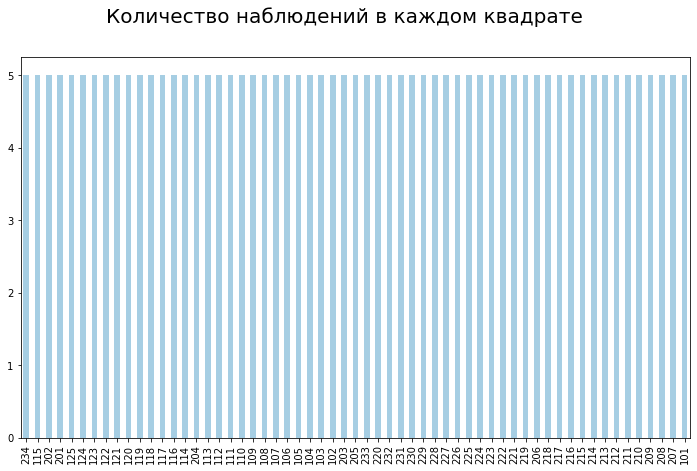

In [301]:
indoor.square.value_counts().plot(kind='bar',figsize=(12,7), colormap='Paired')
pl.suptitle('Количество наблюдений в каждом квадрате',fontsize = 20)

Text(0.5, 0.98, 'Распределение величин')

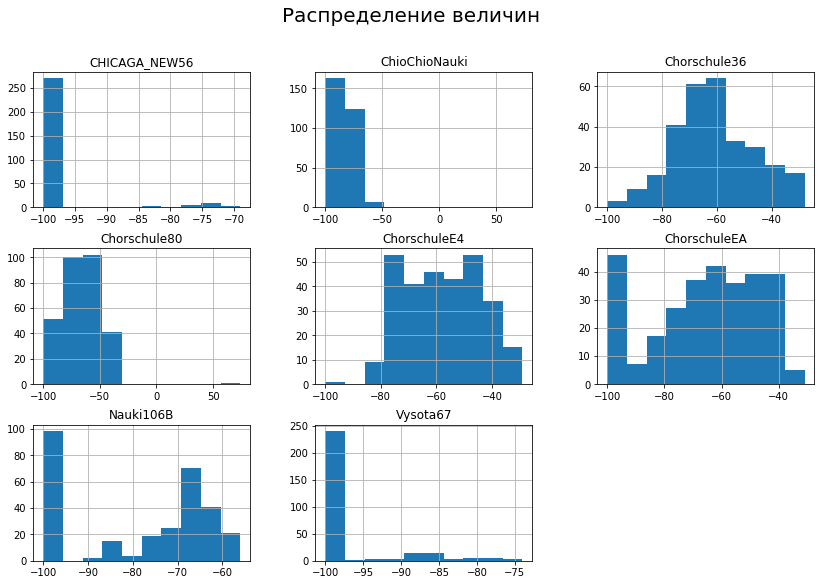

In [302]:
indoor.iloc[:,1:9].hist(figsize=(14,9))
pl.suptitle('Распределение величин',fontsize = 20)

# Сравнение алгоритмов

In [303]:
#библиотеки
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
 

In [304]:
#Кросс-валидатор K-Folds, нужен для разделения данных на наборы для обучения/тестирования
kfold = KFold(n_splits=5, shuffle=True, random_state=4)

## До нормализации данных

In [305]:
#X - RSSI от наших AP, y_k_f - это x,y,z координаты ,y_s - номера квадратов
X = indoor.iloc[:,1:9]
y_k_f = indoor.iloc[:,10:]
y_s = indoor.iloc[:,9]

## Random Forest

In [306]:
forest = MultiOutputClassifier(RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 4,
                                                     max_depth=8))
scores_forest = cross_val_score(forest, X, y_k_f, cv=kfold, n_jobs=-1)
print(scores_forest)

[0.66101695 0.6440678  0.49152542 0.62711864 0.55932203]


## KNN

In [307]:
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3, weights='distance'))

scores_knn = cross_val_score(knn, X, y_k_f, cv=kfold, n_jobs=-1)
print(scores_knn)

[0.66101695 0.66101695 0.66101695 0.6779661  0.66101695]


## SVM

In [308]:
svc = SVC(C=70, kernel='rbf')

scores_svc = cross_val_score(svc, X, y_s, cv=kfold, n_jobs=-1)
print(scores_svc)

[0.27118644 0.16949153 0.30508475 0.28813559 0.3220339 ]


In [309]:
data_scores = {
    'Estimator': ['RandomForest', 'KNN', 'SVM'],
    'Accuracy': [np.mean(scores_forest), np.mean(scores_knn), np.mean(scores_svc)]
}

scores_table = pd.DataFrame.from_dict(data=data_scores)

scores_table.sort_values(by='Accuracy', ascending=False)

,Estimator,Accuracy
1,KNN,0.664407
0,RandomForest,0.596610
2,SVM,0.271186


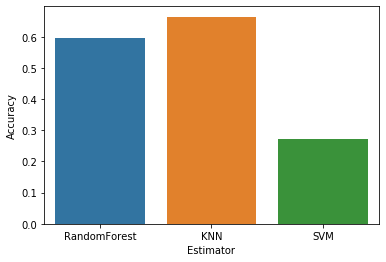

In [310]:
sns.barplot(data=scores_table, x = 'Estimator', y='Accuracy')

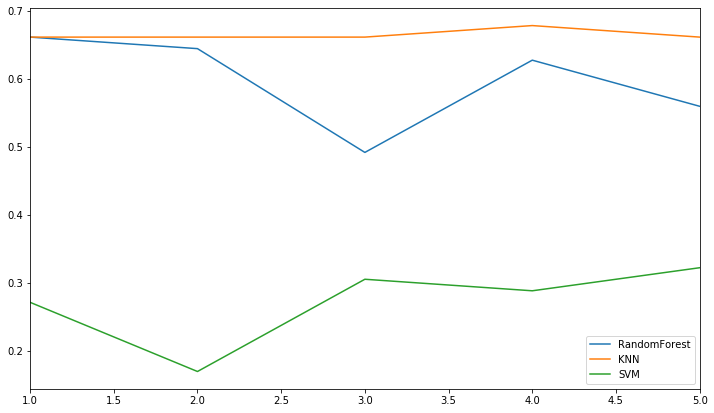

In [311]:
kfold_scores = {
    'RandomForest': scores_forest,
    'KNN': scores_knn,
    'SVM': scores_svc
}

kfold_scores_table = pd.DataFrame(data=kfold_scores, index=range(1,6,1))

kfold_scores_table.plot(figsize=(12,7))

## С нормализацией

In [312]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import tree

In [313]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

## Random Forest

In [314]:
forest_sc = MultiOutputClassifier(RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 4,
                                                     max_depth=8))
scores_forest_sc = cross_val_score(forest_sc, X_sc, y_k_f, cv=kfold, n_jobs=-1)
print(scores_forest_sc)

[0.6440678  0.61016949 0.49152542 0.61016949 0.52542373]


In [328]:
 from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)   

## KNN

In [315]:
knn_sc = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3, weights='distance'))

scores_knn_sc = cross_val_score(knn_sc, X_sc, y_k_f, cv=kfold, n_jobs=-1)
print(scores_knn_sc)

[0.6779661  0.66101695 0.61016949 0.59322034 0.62711864]


## SVM

In [316]:
# разбиваем номер квадрата на 2 части (т.е. 212 будет 2 и 12)
y1 = y_s//100
y2 = y_s%100

In [317]:
y_svm_sc = pd.concat([y1, y2], axis=1)

In [318]:
svc = MultiOutputClassifier(SVC(C=70, kernel='rbf'))

scores_svc_sc = cross_val_score(svc, X_sc, y_svm_sc, cv=kfold, n_jobs=-1)
print(scores_svc_sc)

[0.69491525 0.6779661  0.72881356 0.62711864 0.69491525]


In [319]:
scores_table['Accuracy_sc'] = [np.mean(scores_forest_sc), np.mean(scores_knn_sc), np.mean(scores_svc_sc)]

scores_table.sort_values(by='Accuracy', ascending=False)

,Estimator,Accuracy,Accuracy_sc
1,KNN,0.664407,0.633898
0,RandomForest,0.596610,0.576271
2,SVM,0.271186,0.684746


In [320]:
scores_table['diff'] = scores_table['Accuracy_sc'] - scores_table['Accuracy']


def after_norm(x):
    if x>0:
        return 'стало лучше'
    elif x<0:
        return 'стало хуже'
    else:
        return 'ничего не поменялось'

scores_table['После нормализации'] = scores_table['diff'].apply(lambda x: after_norm(x))
scores_table

,Estimator,Accuracy,Accuracy_sc,diff,После нормализации
0,RandomForest,0.596610,0.576271,-0.020339,стало хуже
1,KNN,0.664407,0.633898,-0.030508,стало хуже
2,SVM,0.271186,0.684746,0.413559,стало лучше


Следовательно, нормализацию данных не используем

## Определение координат

In [321]:
#Обучение алгоритмов
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3, weights='distance'))
knn.fit(X, y_k_f)

svc = SVC(C=70, kernel='rbf')
svc.fit(X, y_s)

forest = MultiOutputClassifier(RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 4, max_depth=8))
forest.fit(X, y_k_f)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=8,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=150,
                                                       n_jobs=None,
                    

# Первый маршрут

In [322]:
xyz1 = knn.predict(route1)
square1 = svc.predict(route1)

xyz1 = pd.DataFrame(data=xyz1, columns=['x', 'y', 'z'])
square1 = pd.DataFrame(data=square1, columns=['square'])

In [323]:
route1_pred = pd.concat([route1, square1, xyz1], axis=1)
route1_pred

,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56,square,x,y,z
0,-54,-78,-66,-68,-100,-75,-81,-100,105,2,1,1
1,-46,-79,-62,-64,-88,-100,-88,-100,105,2,2,1
2,-45,-80,-59,-66,-100,-100,-100,-100,105,2,3,1
3,-36,-71,-60,-47,-100,-100,-87,-100,105,2,4,1
4,-41,-70,-70,-52,-84,-100,-100,-100,105,1,4,1
5,-51,-63,-84,-69,-74,-100,-100,-100,105,1,4,2
6,-55,-62,-77,-68,-72,-100,-100,-100,215,2,4,2
7,-54,-57,-75,-58,-80,-100,-100,-100,105,3,4,2
8,-56,-53,-75,-62,-74,-87,-86,-100,105,4,4,2
9,-68,-42,-70,-52,-69,-85,-86,-100,105,3,5,2


In [324]:
xyz3 = forest.predict(route1)
xyz3 = pd.DataFrame(data=xyz3, columns=['x', 'y', 'z'])
route1_pred = pd.concat([route1, xyz3], axis=1)
route1_pred

,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56,x,y,z
0,-54,-78,-66,-68,-100,-75,-81,-100,2,1,1
1,-46,-79,-62,-64,-88,-100,-88,-100,3,3,1
2,-45,-80,-59,-66,-100,-100,-100,-100,2,3,1
3,-36,-71,-60,-47,-100,-100,-87,-100,2,4,1
4,-41,-70,-70,-52,-84,-100,-100,-100,3,4,1
5,-51,-63,-84,-69,-74,-100,-100,-100,1,4,2
6,-55,-62,-77,-68,-72,-100,-100,-100,2,4,2
7,-54,-57,-75,-58,-80,-100,-100,-100,3,4,2
8,-56,-53,-75,-62,-74,-87,-86,-100,4,4,2
9,-68,-42,-70,-52,-69,-85,-86,-100,3,5,2


# Второй маршрут

In [325]:
xyz2 = knn.predict(route2)
square2 = svc.predict(route2)

xyz2 = pd.DataFrame(data=xyz2, columns=['x', 'y', 'z'])
square2 = pd.DataFrame(data=square2, columns=['square'])

In [326]:
route2_pred = pd.concat([route2, square2, xyz2], axis=1)
route2_pred

,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56,square,x,y,z
0,-54,-78,-66,-68,-100,-75,-81,-100,105,2,1,1
1,-46,-79,-64,-65,-100,-100,-84,-100,103,3,2,1
2,-45,-80,-59,-66,-100,-100,-100,-100,105,2,3,1
3,-36,-71,-60,-47,-100,-100,-87,-100,105,2,4,1
4,-50,-59,-44,-30,-100,-100,-89,-100,105,2,5,1
5,-57,-51,-47,-35,-100,-100,-68,-100,105,3,6,1
6,-66,-49,-43,-42,-100,-100,-72,-100,118,2,7,1
7,-58,-50,-46,-44,-100,-100,-100,-100,121,2,8,1
8,-59,-56,-43,-46,-68,-100,-74,-100,105,2,8,1


## Random forest

In [327]:
xyz4 = forest.predict(route2)
xyz4 = pd.DataFrame(data=xyz4, columns=['x', 'y', 'z'])
route2_pred = pd.concat([route2, xyz4], axis=1)
route2_pred

,Chorschule80,ChorschuleE4,ChorschuleEA,Chorschule36,Nauki106B,Vysota67,ChioChioNauki,CHICAGA_NEW56,x,y,z
0,-54,-78,-66,-68,-100,-75,-81,-100,2,1,1
1,-46,-79,-64,-65,-100,-100,-84,-100,3,2,1
2,-45,-80,-59,-66,-100,-100,-100,-100,2,3,1
3,-36,-71,-60,-47,-100,-100,-87,-100,2,4,1
4,-50,-59,-44,-30,-100,-100,-89,-100,2,5,1
5,-57,-51,-47,-35,-100,-100,-68,-100,2,6,1
6,-66,-49,-43,-42,-100,-100,-72,-100,2,7,1
7,-58,-50,-46,-44,-100,-100,-100,-100,2,8,1
8,-59,-56,-43,-46,-68,-100,-74,-100,1,9,1
